<a href="https://colab.research.google.com/github/AbzK-IUB/CSE486-DIP-assignment-01/blob/main/CSE486_DIP_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 01 for CSE486, Digital Image Processing**
### **Code written by:**
### Abyaz Karim
### **ID:** 2110366

Note: This is a copy uploaded to GitHub for convenience.

In [ ]:
# Library Imports

# numpy needed for dealing with images in the form of arrays
import numpy as np
# matplotlib used to display image outputs
import matplotlib.pyplot as plt
%matplotlib inline
# myriad imports from skimage
import skimage
import skimage.io
from skimage.filters.rank import median
# statistics import to find mode values in arrays
import statistics as st
# opencv used to apply the masks to the RGB images
import cv2

## **Functions for Creating Masks and Counting Coins**
The threholding performed on the images here are done on grayscale images.

In [ ]:
def coin_mask(a):

   # This function produces a mask for an image based on the mode number of
   # pixels to find the threshold. This works on just one of the channels
   # of image provided. This function is designed assuming the background is
   # one solid colour or value. The thresholding applied is global for all
   # cases.

  coins_k = a[:,:,1] # green channel of the images provide satisfactory results
  median_blur = median(coins_k,skimage.morphology.disk(9)) # median rank filter used to blur coin texture while preserving outer edges
  mode1 = st.mode(np.ndarray.flatten(median_blur)) # mode number of pixels taken from blurred image

  if 235 <= mode1 <= 255: # when bg is light and fg is dark
    th = 235
    c_bin = median_blur < th
    c_bin = skimage.morphology.remove_small_objects(c_bin, 70) # the two lines provided under each condition help clean the image up to allow better coin counting later
    c_bin = skimage.morphology.remove_small_holes(c_bin, 70)

  elif 0 <= mode1 <= 25: # when bg is dark and fg is light
    th = 25
    c_bin = median_blur > th
    c_bin = skimage.morphology.remove_small_objects(c_bin, 70)
    c_bin = skimage.morphology.remove_small_holes(c_bin, 70)

  elif 25 < mode1 < 235: # when the bg and fg have similar grayscale values
    th1, th2 = mode1-10, mode1+10
    ths = np.array([th1,th2]) # image split into 3 possible regions with np.digitize function
    digi_coins = np.digitize(median_blur, bins=ths)
    mode2 = st.mode(np.ndarray.flatten(digi_coins))
    c_bin = digi_coins > 1
    c_bin = skimage.morphology.remove_small_objects(c_bin, 70)
    c_bin = skimage.morphology.remove_small_holes(c_bin, 70)

  return c_bin # binary mask produced

def coin_count(b):

  # This function is applied onto masks for best results.

  labels = skimage.measure.label(b) # similar pixels are grouped together
  count = labels.max() # the groups are then counted
  return count

## **Functions Applied to Coins Image 1:**

Number of coins counted: 8
Actual number of coins: 8


(-0.5, 611.5, 316.5, -0.5)

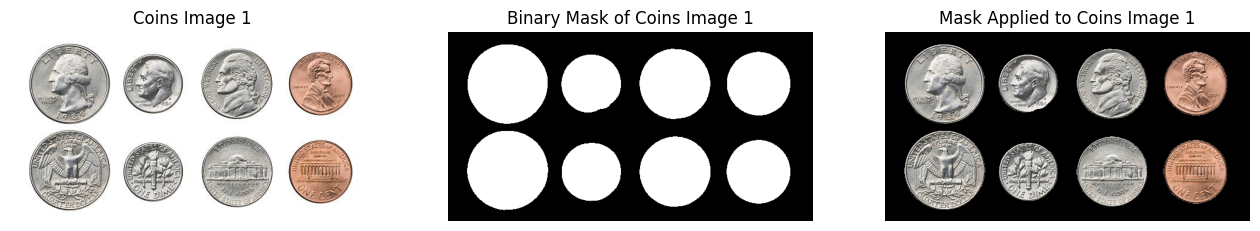

In [ ]:
coins1 = skimage.io.imread("https://github.com/AbzK-IUB/CSE486-DIP-assignment-01/blob/main/Coins1.jpg?raw=true")
c1_mask = coin_mask(coins1).astype("uint8")
c1_filtered = cv2.bitwise_and(coins1,coins1,mask = c1_mask)

print("Number of coins counted:",coin_count(c1_mask.astype('bool')))
print("Actual number of coins: 8")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,14))

ax[0].imshow(coins1, cmap='gray')
ax[0].set_title('Coins Image 1')
ax[0].axis('off')

ax[1].imshow(c1_mask, cmap='gray')
ax[1].set_title('Binary Mask of Coins Image 1')
ax[1].axis('off')

ax[2].imshow(c1_filtered, cmap='gray')
ax[2].set_title('Mask Applied to Coins Image 1')
ax[2].axis('off')


## **Functions Applied to Coins Image 2:**

Number of coins counted: 10
Actual number of coins: 8


(-0.5, 749.5, 351.5, -0.5)

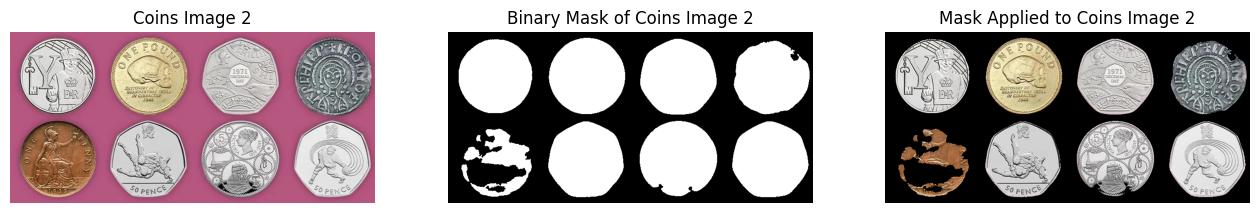

In [ ]:
coins2 = skimage.io.imread("https://github.com/AbzK-IUB/CSE486-DIP-assignment-01/blob/main/Coins2.jpg?raw=true")
c2_mask = coin_mask(coins2).astype("uint8")
c2_filtered = cv2.bitwise_and(coins2,coins2,mask = c2_mask)

print("Number of coins counted:",coin_count(c2_mask.astype('bool')))
print("Actual number of coins: 8")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,14))

ax[0].imshow(coins2, cmap='gray')
ax[0].set_title('Coins Image 2')
ax[0].axis('off')

ax[1].imshow(c2_mask, cmap='gray')
ax[1].set_title('Binary Mask of Coins Image 2')
ax[1].axis('off')

ax[2].imshow(c2_filtered, cmap='gray')
ax[2].set_title('Mask Applied to Coins Image 2')
ax[2].axis('off')

## **Functions Applied to Coins Image 3:**

Number of coins counted: 37
Actual number of coins: 38


(-0.5, 1918.5, 1279.5, -0.5)

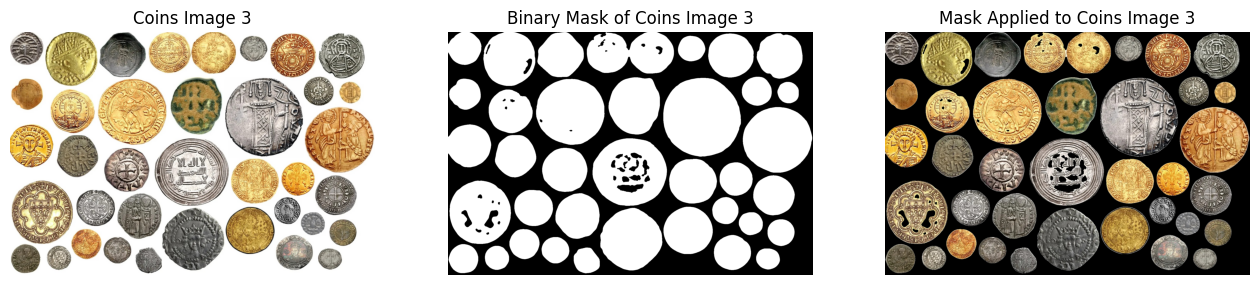

In [ ]:
coins3 = skimage.io.imread("https://github.com/AbzK-IUB/CSE486-DIP-assignment-01/blob/main/Coins3.jpg?raw=true")
c3_mask = coin_mask(coins3).astype("uint8")
c3_filtered = cv2.bitwise_and(coins3,coins3,mask = c3_mask)

print("Number of coins counted:",coin_count(c3_mask.astype('bool')))
print("Actual number of coins: 38")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,14))

ax[0].imshow(coins3, cmap='gray')
ax[0].set_title('Coins Image 3')
ax[0].axis('off')

ax[1].imshow(c3_mask, cmap='gray')
ax[1].set_title('Binary Mask of Coins Image 3')
ax[1].axis('off')

ax[2].imshow(c3_filtered, cmap='gray')
ax[2].set_title('Mask Applied to Coins Image 3')
ax[2].axis('off')